# Cpt3. 신경망
---
    퍼셉트론: 복잡한 함수도 표현가능
    But 가중치를 설정해 주어야 함
    신경망: 가중치 매개변수의 적절한 값을 자동으로 학습

## 3.1 퍼셉트론에서 신경망으로
---
![img](1.jpeg)

* **입력층**: 0층
* **은닉층**: 1층
* **출력층**: 2층  

+) 문헌에 따라 2층/3층이라고 불 수도 있지만 이 책에서는 0층부터 시작함.  
파이썬 인덱스 / 구현하기 편함
    
### 3.1.2 퍼셉트론 복습
---
![img](2.jpeg)

$y = \begin{cases}  & \text{ 0 } (b + {w}_{1}{x}_{1} + {w}_{2}{x}_{2} \leq 0) \\  & \text{ 1 } (b + {w}_{1}{x}_{1} + {w}_{2}{x}_{2} > 0)  \end{cases} $

* **편향**: b
* **가중치**: ${w}_{1}, {w}_{2}$

![img](3.jpeg)

    편향의 입력신호는 항상 1  
    위 식을 다음 두가지 식으로 분리 가능  
$y = h(b + {w}_{1}{x}_{1} + {w}_{2}{x}_{2} )$  
$h(x) = \begin{cases}  & \text{ 0 } (x \leq 0) \\  & \text{ 1 } (x > 0)  \end{cases} $  

### 3.1.3 활성화 함수의 등장
---
$ a = b + {w}_{1}{x}_{1} + {w}_{2}{x}_{2}$  
$ y = h(a)$  
* **활성화 함수(Activation Function)**: h(x)

![img](4.jpeg)

* 뉴런 = 노드

![img](5.jpeg)

+) 퍼셉트론을 가리키는 알고리즘을 엄밀히 통일하지는 않음  
    단순 퍼셉트론: 단층 네트워크, 계단 함수  
    다층 퍼셉트론: 여러층, 매끈한 활성화 함수  

## 3.2 활성화 함수
---
    퍼셉트론과 신경망의 중요한 차이는 활성화 함수의 차이
    계단함수 vs 시그모이드 함수
    
### 3.2.1 시그모이드 함수
---
* **시그모이드 함수**  

$h(x) = \frac{1}{1+exp(-x)}$

### 3.2.2 계단 함수 구현하기
---

In [1]:
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


In [2]:
y = y.astype(np.int)
print(y)

[0 1 1]


### 3.2.3 계단 함수의 그래프
---

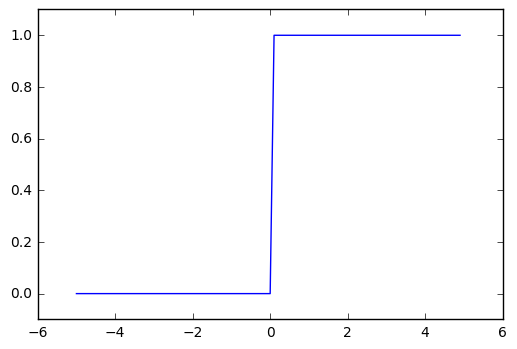

In [3]:
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  
plt.show()

### 3.2.4 시그모이드 함수 구현하기
---

* 넘파이 브로드캐스트 기능  

+) 시그모이드: S자 모양이라는 의미

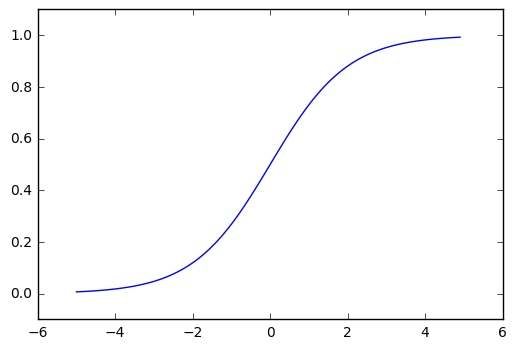

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


### 3.2.5 시그모이드 함수와 계단 함수 비교
---
    공통점: 입력이 작을때 0 가까이, 입력이 클때 1 가까이 출력. 0~1사이
    차이점: 매끄러움

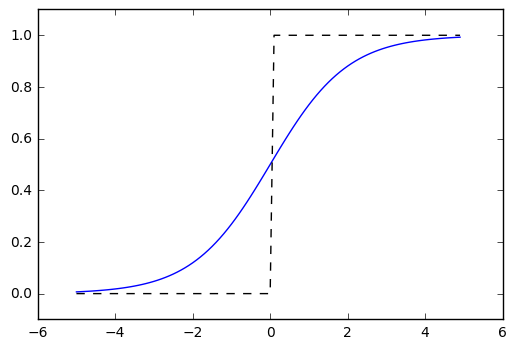

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.6 비선형 함수
---
    선형 함수: f(x) = ax + b 형태
    비선형 함수: 그 외
    
    활성화 함수가 선형 함수라면 신경망 층을 깊게 하는 의미가 없어짐
    활성화 함수로는 반드시 비선형 함수를 사용

### 3.2.7 ReLU함수
---
* **ReLU(Rectified Linear Unit)**  
    입력이 0을 넘으면 그 입력을 그대로 출력, 0이하면 0을 출력  
$h(x) = \begin{cases}  & \text{ 0 } (x \leq 0) \\  & \text{ x } (x > 0)  \end{cases} $  
    +) 정류된 선형함수: +,- 중 한 쪽을 차단하는 회로

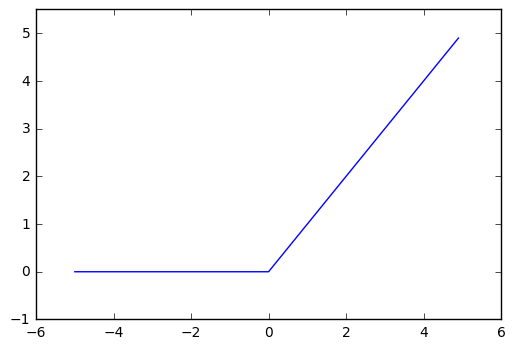

In [6]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


## 3.3 다차원 배열의 계산
---
### 3.3.1 다차원 배열
---
    다차원 배열: 숫자의 집합

In [7]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [8]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


* **행렬 / 행 / 열**
![img](10.jpeg)

### 3.3.2 행렬의 내적(행렬 곱)
---
![img](11.jpeg)

![img](12.jpeg)

![img](13.jpeg)

In [9]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

### 3.3.3 신경망의 내적
---
![img](14.jpeg)

dot기능이 매우 중요!

## 3.4 3층 신경망 구현하기
---
![img](15.jpeg)

### 3.4.1 표기법 설명
---
![img](16.jpeg)

### 3.4.2 각 층 신호 전달 구현하기
---
![img](17.jpeg)

${A}^{(1)} = X{W}^{(1)} + {B}^{(1)}$

    A = (1x3)
    X = (1x2)
    B = (1x3)
    W = (2x3)
    
![img](18.jpeg)

![img](19.jpeg)

![img](20.jpeg)

* **출력층의 활성화함수**: $\sigma()$  
    출력층의 활성화 함수는 풀고자 하는 문제에 맞게 설정
    회귀: 항등 함수
    2클래스 분류: 시그모이드
    다중 클래스 분류: 소프트맥스
    
### 3.4.3 구현 정리
---
    Forward vs Backward

In [10]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 3.5 출력층 설계하기
---
    회귀 vs 분류
    회귀: 항등 함수
    분류: 소프트맥스
    
### 3.5.1 항등 함수와 소프트 맥스 함수 구현하기
---
* **항등 함수**
![img](21.jpeg)

* **소프트맥스 함수**  
${y}_{k} = \frac{exp({a}_{k})}{\sum_{i = 1}^{n}exp({a}_{i})}$

    뉴련이 모든 입력신호에서 영향을 받음

![img](22.jpeg)


In [11]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))

[ 0.01821127  0.24519181  0.73659691]


### 3.5.2 소프트 맥스 함수 구현시 주의점
---
    값이 너무 커질 경우 수치가 불안정해짐
${y}_{k} = \frac{exp({a}_{k})}{\sum_{i = 1}^{n}exp({a}_{i})} =  \frac{C exp({a}_{k})}{C\sum_{i = 1}^{n}exp({a}_{i})} $  
$ \frac{exp({a}_{k} + logC)}{\sum_{i = 1}^{n}exp({a}_{i} + logC)}$  
$ \frac{exp({a}_{k} + C')}{\sum_{i = 1}^{n}exp({a}_{i} + C')}$  
    해결책: 특정 정수를 더하거나 뺌(보통 max값)

In [12]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))
c = np.max(a)
a - c
print(np.exp(a-c)/np.sum(np.exp(a-c)))

[ nan  nan  nan]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


/Users/SungwonLyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/SungwonLyu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수의 특징
---
    출력: 0~1사이 실수
    총합: 1 => 확률로 해석할 수 있음
    대소관계는 변하지 않음(단조 증가 함수)
    => 학습할 때 소프트 맥스 함수를 사용하지만 추론 단계에서는 소프트맥스 함수를 생략하는 것이 일반적
    
### 3.5.4 출력층의 뉴런 수 정하기
---

![img](23.jpeg)


## 3.6 손글씨 숫자 인식
---
* **순전파(Forward propagation)**
    학습과정 생략하고 추론과정만 구현

### 3.6.1 MNIST 데이터셋
---
![img](24.jpeg)


In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28) 
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


    Normalize = 0~1값으로 정규화 [전처리]
    Flatten = 입력 이미지를 1차원 배열로 만듬
    one_hot_label = 원핫 인코딩 [0,0,0,0,0,0,0,1,0,0]
    pickle: 특정 객체를 피클로 로드하면 복원해서 이용 가능
    
### 3.6.2 신경망의 추론 처리
---

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import pickle
from mnist import load_mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) 
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


+) 전처리: 범위로 나누는 단순 정규화 / 평균 표준편차 활용한 정규화 / 범위 제한 정규화 / 균일하게 분포하게 만드는 백색화 등

### 3.6.3 배치 처리
---
![img](26.jpeg)

![img](27.jpeg)

    배치를 사용하는 이유: 라이브러리들이 배열을 효율적으로 처리할 수 있도록 고도로 최적화 되어있음
    컴퓨터 자체에서 큰 배열을 한번에 계산하는 것이 더 빠름

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import pickle
from mnist import load_mnist


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


In [17]:
x = np.array([[0.2, 0.8, 0.1], 
              [0.3, 0.2, 0.6], 
              [0.2, 0.5, 0.3], 
              [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1) # 가로
print(y)
y = np.argmax(x, axis = 0)# 세로
print(y)

[1 2 1 0]
[3 0 1]
